## Regression Week 1: Simple Linear Regression
In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. You will:

* Use Pandas and numpy to compute important summary statistics
* Write a function to compute the Simple Linear Regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train_data=pd.read_csv('~/Desktop/Regression/Simple_Linear_regression/Pandas/kc_house_train_data.csv')
test_data=pd.read_csv('~/Desktop/Regression/Simple_Linear_regression/Pandas/kc_house_test_data.csv')
sales_data=pd.concat([train_data,test_data])

In [12]:
len(sales_data)

21613

In [45]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Using numpy to compute mean 

* Computing the sum of a dataframe's column

* Computing the arithmetic average (mean) of dataframe's column

* multiplying dataframe's column by constants

* multiplying dataframe's column by dataframe's column

In [ ]:
# Let's compute the mean of the House Prices in King County in 2 different ways.
prices = sales_data['price'] # extract the price column of the sales SFrame -- this is now an SArray

# recall that the arithmetic average (the mean) is the sum of the prices divided by the total number of houses:
sum_prices = prices.sum()
num_houses = len(prices) # when prices is an SArray len() returns its length
avg_price_1 = sum_prices/num_houses
avg_price_2 = prices.mean() # if you just want the average, the .mean() function
print ("average price via method 1: " + str(avg_price_1))
print ("average price via method 2: " + str(avg_price_2))

As we can see we get the same value in both ways

In [14]:
# if we want to multiply every price by 0.5 it's a simple as:
half_prices = 0.5*prices
# Let's compute the sum of squares of price. We can multiply two SArrays of the same length elementwise also with *
prices_squared = prices*prices
sum_prices_squared = prices_squared.sum() # price_squared is an SArray of the squares and we want to add them up.
print ("the sum of price squared is: " + str(sum_prices_squared))

the sum of price squared is: 9217325138472070.0


# Build a generic simple linear regression function
Function to get the slope and intercept for a linear model with single input 

In [15]:
def simple_linear_regression(input_feature, output):
    input_sum=input_feature.sum()
    output_sum=output.sum()# compute the sum of input_feature and output
    N=len(input_feature)
    out_in=(input_feature*output).sum()# compute the product of the output and the input_feature and its sum
    
    input_squared=(input_feature**2).sum()# compute the squared value of the input_feature and its sum
    
    num=out_in-(1/N)*(input_sum*output_sum)
    denom=input_squared-(1/N)*(input_sum*input_sum)
    slope=num/denom# use the formula for the slope
    
    intercept=(1/N)*(output_sum-(slope*input_sum))# use the formula for the intercept
    
    return (intercept, slope)

In [16]:
test_feature = np.array(np.arange(5))
test_output = np.array(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))

Intercept: 1.0
Slope: 1.0


Now let's train this simple linear regression on our train data

In [17]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: -47116.07907289412
Slope: 281.9588396303426


# Predicting Values

Now that we have the model parameters: intercept & slope we can make predictions. Using SArrays it's easy to multiply an SArray by a constant and add a constant value. Complete the following function to return the predicted output given the input_feature, slope and intercept:



In [18]:
def predict(input_feature, intercept, slope):
    predicted_values=intercept+(slope*input_feature)# calculate the predicted values:
    
    return predicted_values

Now that we can calculate a prediction given the slope and intercept let's make a prediction. Use (or alter) the following to find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

**Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?**

In [19]:
my_house_sqft = 2650
estimated_price = predict(my_house_sqft, sqft_intercept, sqft_slope)
print ("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


# Residual Sum of Squares
Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following (or write your own) function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [20]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    predictions=predict(input_feature=input_feature,
                                           intercept=intercept,slope=slope)# First get the predictions

    RSS=(output-predictions)**2# then compute the residuals (since we are squaring it doesn't matter which order you subtract)

    Rss=RSS.sum()# square the residuals and add them up

    return(Rss)

In [21]:
print (get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) # should be 0.0

0.0


Now use your function to calculate the RSS on training data from the squarefeet model calculated above.

**Quiz Question: According to this function and the slope and intercept from the squarefeet model What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?**

In [22]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1201918354177283.0


# Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

Complete the following function to compute the inverse regression estimate, i.e. predict the input_feature given the output.

In [23]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_feature=(output-intercept)/slope
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:

    return estimated_feature

Now that we have a function to compute the squarefeet given the price from our simple regression model let's see how big we might expect a house that costs $800,000 to be.

**Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?**

In [24]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


# New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [25]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
bedrooms_intercept, bedrooms_slope=simple_linear_regression(train_data['bedrooms'], train_data['price'])


# Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

**Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.**

In [26]:
# Compute RSS when using bedrooms on TEST data:
rss_prices_on_bedrooms = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bedrooms_intercept, bedrooms_slope)
print ('The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bedrooms))

The RSS of predicting Prices based on Bedrooms is : 493364585960301.0


In [27]:
# Compute RSS when using squarefeet on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 275402933617812.12


In [28]:
print(rss_prices_on_bedrooms > rss_prices_on_sqft)

True


# Plot our data to check which feature has a linear behavior with the output

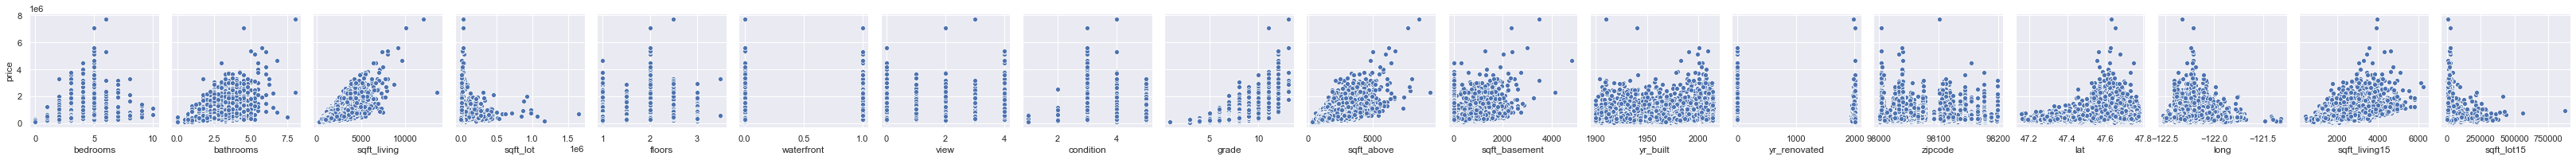

In [70]:
sns.pairplot(data=train_data,y_vars='price',x_vars=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])